In [127]:
import sys
import os
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

sys.path.append(os.path.abspath(os.path.join("..", "src")))

df = pd.read_csv('../Data/Processed/hotel_clean4.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          29999 non-null  int64  
 1   no_of_children                        29999 non-null  int64  
 2   no_of_weekend_nights                  29999 non-null  int64  
 3   no_of_week_nights                     29999 non-null  int64  
 4   required_car_parking_space            29999 non-null  int64  
 5   lead_time                             29999 non-null  int64  
 6   arrival_year                          29999 non-null  int64  
 7   arrival_month                         29999 non-null  int64  
 8   arrival_date                          29999 non-null  int64  
 9   repeated_guest                        29999 non-null  int64  
 10  no_of_previous_cancellations          29999 non-null  int64  
 11  no_of_previous_

In [128]:

from sklearn.model_selection import train_test_split

# critères de base
features = [
    'no_of_special_requests', 'price_per_person',
    'required_car_parking_space', 'total_nights', 'total_people',
    'room_type_reserved', 'repeated_guest', 'no_of_previous_cancellations',
    'meal_plan_selected', 'avg_price_per_room',
    'market_segment_type_Online', 'is_family', 'stay_duration_flag', 'lead_time_category_181j+', 'lead_time_category_91-180j','lead_time_category_31-90j', 'lead_time_category_8-30j'
]
x = df[features]
# Critère à prédire
y = df['booking_status_Not_Canceled']


In [129]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [130]:
model = DecisionTreeClassifier(max_depth=15)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=15)

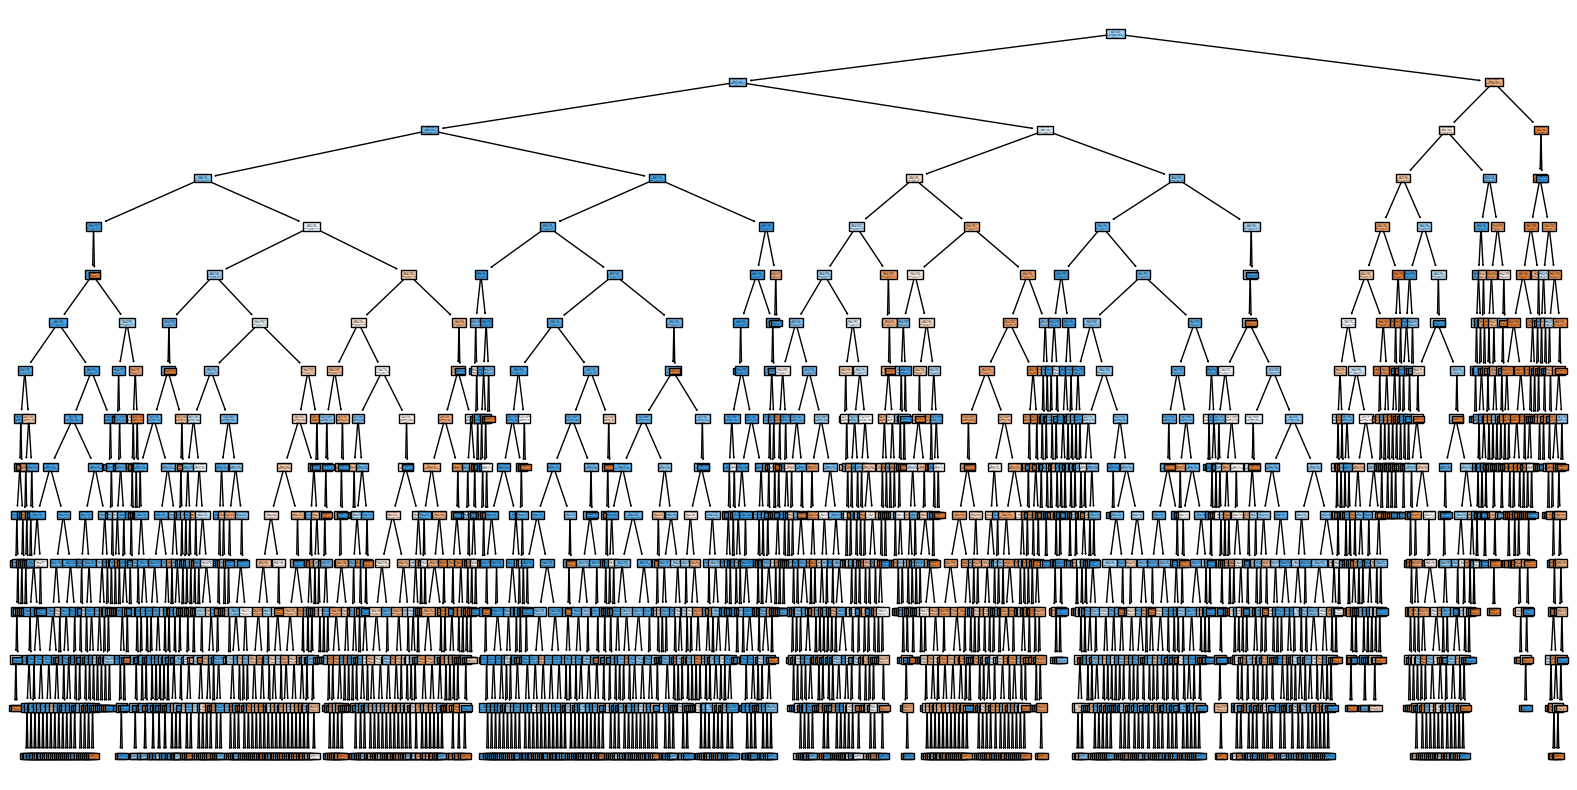

In [131]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# 6. Affichage graphique de l'arbre pour débugger avec plot_tree
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, class_names=y_train.unique().astype(str))
plt.show()

Decision Tree Classifier:
Accuracy sur les données de test :  0.84
Score moyen par validation croisée :  0.84
Précision :  0.87
Rappel :  0.91
Erreur quadratique moyenne :  0.1558
Accuracy (via accuracy_score) :  0.8442
Matrice de confusion :
 [[1456  561]
 [ 374 3609]]


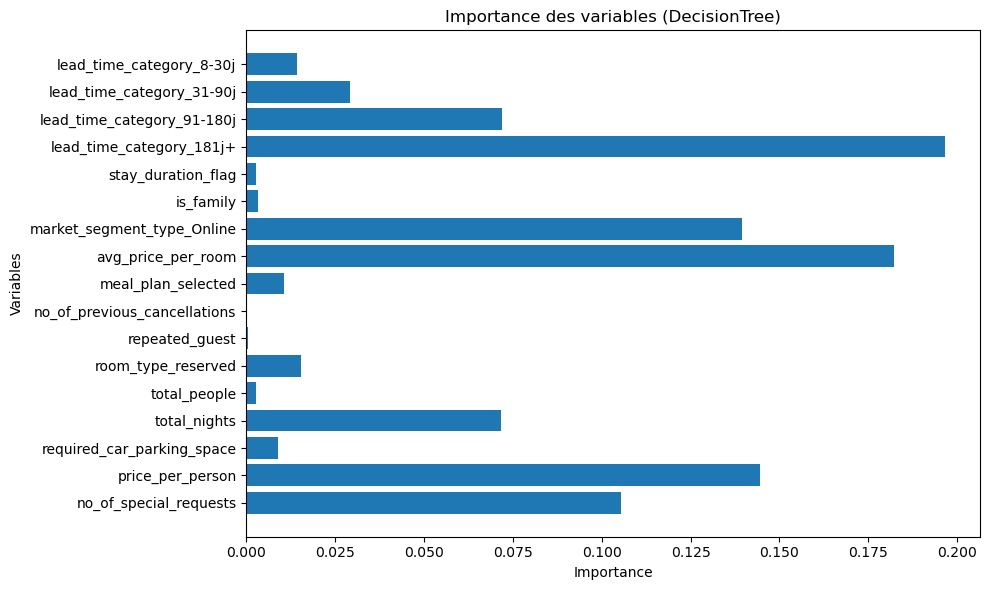

In [132]:

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# DecisionTree

# 6. Prédictions
y_pred = model.predict(x_test)

# 7. Évaluation
print('Decision Tree Classifier:')
print("Accuracy sur les données de test : ", np.round(model.score(x_test, y_test), 2)) # 0.86
print("Score moyen par validation croisée : ",
      np.round(np.mean(cross_val_score(model, x, y, cv=5)), 2)) # 0.86
print("Précision : ", np.round(precision_score(y_test, y_pred), 2)) # 0.87
print("Rappel : ", np.round(recall_score(y_test, y_pred), 2)) # 0.93
print("Erreur quadratique moyenne : ", np.round(mean_squared_error(y_test, y_pred), 4)) # 0.1388
print("Accuracy (via accuracy_score) : ", np.round(accuracy_score(y_test, y_pred), 4)) # 0.8612

# 8. Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
print("Matrice de confusion :\n", cm)
#   [[1467  547]
#   [ 273 3622]]
# 9. Importance des variables
importances = model.feature_importances_
features = x_train.columns
plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.title("Importance des variables (DecisionTree)")
plt.xlabel("Importance")
plt.ylabel("Variables")
plt.tight_layout()
plt.show()


📷 Graphique sauvegardé dans : rfr_predict_errorDecisionTree.png


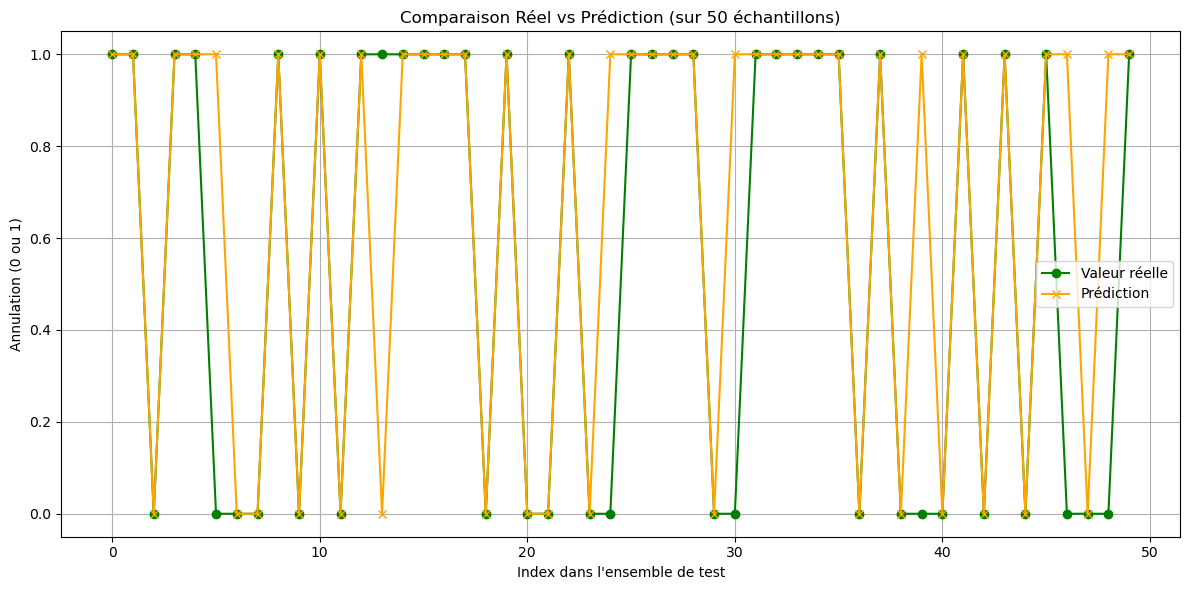

In [133]:
from graph_utils import display_predict_diff_errors2
display_predict_diff_errors2(y_test, y_pred, n=50, save_path="rfr_predict_errorDecisionTree.png")

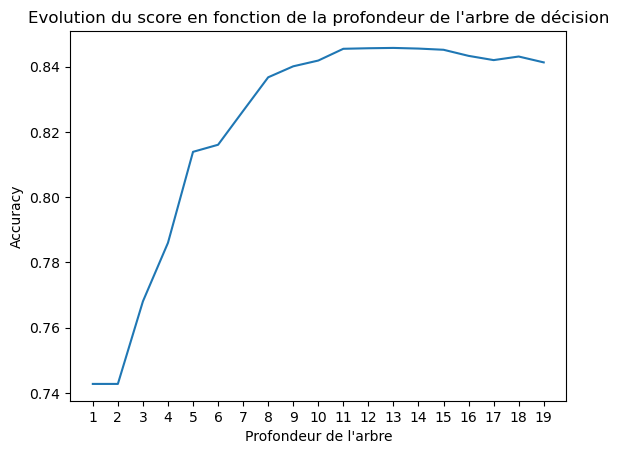

Score maximum pour une profondeur de 13


In [134]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
scores = []
for i in range(1, 20):
    model = DecisionTreeClassifier(max_depth=i)
    score_val = np.mean(cross_val_score(model, x, y, cv=5))
    scores.append(score_val)

plt.plot(range(1, 20), scores)
plt.xticks(range(1, 20))
plt.xlabel('Profondeur de l\'arbre')
plt.ylabel('Accuracy')
plt.title('Evolution du score en fonction de la profondeur de l\'arbre de décision')
plt.show()

prof_max = np.argmax(scores) + 1
print("Score maximum pour une profondeur de", prof_max) # 11